#Exercise 1: Linear Regression

In [261]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Part 1: Basic Function 
 Complete warm_up_exercise. 


In [262]:
def warm_up_exercise():
    #WARMUPEXERCISE Example function in Python
    #   A = WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix

    # ============= YOUR CODE HERE ==============
    # Instructions: Return the 5x5 identity matrix 

    A = np.eye(5,5)

    # ===========================================

    
    return A

A 5x5 identity matrix:

In [263]:
warm_up_exercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Part 2: Plotting 


In [264]:
data = pandas.read_csv('ex1data1.txt', header=None, names=['population', 'profit'])

In [265]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [266]:
data.shape

(97, 2)

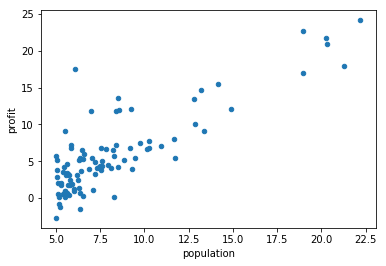

In [267]:
data.plot(x='population', y='profit', kind='scatter')

## Part 3: Gradient descent

In [268]:
# Adding a column of ones to the dataset
data.insert(0, 'ones', 1.)
data.head()

,ones,population,profit
0,1.0,6.1101,17.5920
1,1.0,5.5277,9.1302
2,1.0,8.5186,13.6620
3,1.0,7.0032,11.8540
4,1.0,5.8598,6.8233


Initialize fitting parameters:

In [269]:
theta = np.zeros(2)

Gradient descent settings:

In [270]:
iterations = 1500
alpha = 0.01

Getting the pandas data as raw numpy arrays:

In [271]:
X = data[['ones', 'population']].values
Y = data['profit'].values
m = len(data)

In [272]:
def compute_cost(X, y, theta):
    # COMPUTECOST Compute cost for linear regression
    # J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    # parameter for linear regression to fit the data points in X and y
    
    # some useful values
    m = len(X)
    
    # You need to return this value correctly:
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    y_hat = theta.dot(X.T)
    J = np.sum((y_hat - y)**2) / (2*m)
    # ============================================================
    return J

Cost at initial theta:

In [273]:
compute_cost(X, Y, theta)

32.072733877455676

In [274]:
def gradient_descent(X, y, theta, alpha, num_iters):
    # GRADIENTDESCENT Performs gradient descent to learn theta
    # theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    # taking num_iters gradient steps with learning rate alpha
    
    # Initialize
    J_history = np.zeros((num_iters,))
    T_history = np.zeros((num_iters,2))
    
    m = len(X)
    for i in range(num_iters):
        T_history[i] = theta

        ### ========= YOUR CODE HERE ============
        # Instructions: Perform a single gradient step on the parameter vector theta.
        y_hat = theta.dot(X.T)
        theta = theta -  alpha  * np.sum((y_hat - y) * X[:,0]) / m       
        ### =====================================
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history, T_history

Run gradient descent:

In [275]:
theta, J_history, T_history = gradient_descent(X, Y, theta, alpha, iterations)

theta: [ 0.05839135  0.05839135]
cost: 28.0854405503
theta: [ 0.11143417  0.11143417]
cost: 24.7551420159
theta: [ 0.15961837  0.15961837]
cost: 21.9706563523
theta: [ 0.203389  0.203389]
cost: 19.6399012145
theta: [ 0.24315033  0.24315033]
cost: 17.6865858642
theta: [ 0.27926959  0.27926959]
cost: 16.0474786356
theta: [ 0.31208041  0.31208041]
cost: 14.6701495054
theta: [ 0.34188582  0.34188582]
cost: 13.5111049509
theta: [ 0.36896111  0.36896111]
cost: 12.5342467346
theta: [ 0.39355636  0.39355636]
cost: 11.7095981842
theta: [ 0.41589874  0.41589874]
cost: 11.0122513846
theta: [ 0.43619459  0.43619459]
cost: 10.4214968239
theta: [ 0.45463139  0.45463139]
cost: 9.92010374465
theta: [ 0.47137942  0.47137942]
cost: 9.49372498881
theta: [ 0.48659335  0.48659335]
cost: 9.13040469199
theta: [ 0.50041373  0.50041373]
cost: 8.82017095859
theta: [ 0.51296818  0.51296818]
cost: 8.55469876058
theta: [ 0.52437267  0.52437267]
cost: 8.32703087438
theta: [ 0.53473253  0.53473253]
cost: 8.131346791

Theta found by gradient descent:

In [276]:
theta

array([ 0.63747408,  0.63747408])

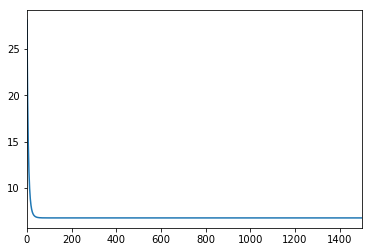

In [277]:
pandas.Series(J_history).plot()

Predicting profit for population size 35000 and 70000:

In [278]:
np.array([1, 3.5]).dot(theta) * 10000

28686.333470118061

In [279]:
np.array([1, 7]).dot(theta) * 10000

50997.926169098777

## Part 4: Visualizing J(theta_0, theta_1) 

In [280]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-1, 4, 100))

In [281]:
J_vals = np.zeros(xx.shape)

In [282]:
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        J_vals[i, j] = compute_cost(X, Y, np.array([xx[i,j], yy[i,j]]))

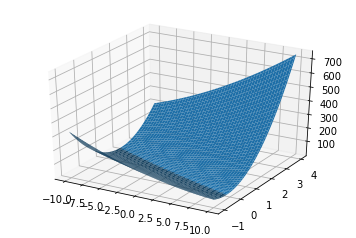

In [283]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, J_vals)

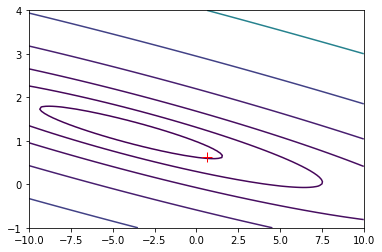

In [289]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, J_vals, levels=np.logspace(-2, 3, 15))
ax.plot(theta[0], theta[1], 'r+', markersize=10)

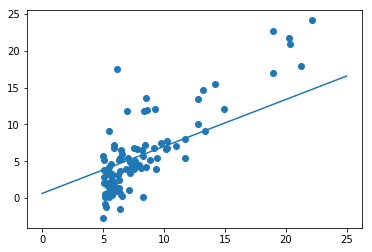

In [290]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data.population, data.profit)
Xs = np.linspace(0,25,100)
def Ys(theta):
    return theta[0] + Xs*theta[1]
ax.plot(Xs, Ys(theta))

In [291]:
T_history

array([[ 0.        ,  0.        ],
       [ 0.05839135,  0.05839135],
       [ 0.11143417,  0.11143417],
       ..., 
       [ 0.63747408,  0.63747408],
       [ 0.63747408,  0.63747408],
       [ 0.63747408,  0.63747408]])

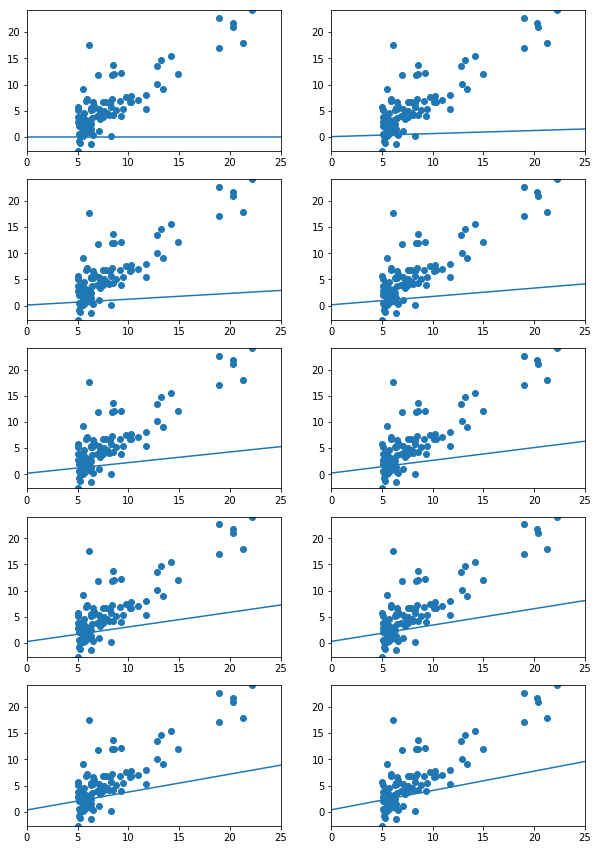

In [297]:
fig = plt.figure(figsize=(10,15))
for i, t in enumerate(T_history[:10]):
    ax = fig.add_subplot(5,2,i+1)
    ax.autoscale(tight=True)
    ax.scatter(data.population, data.profit)
    ax.plot(Xs, Ys(t))